/tmp/ipython-input-1983132646.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)


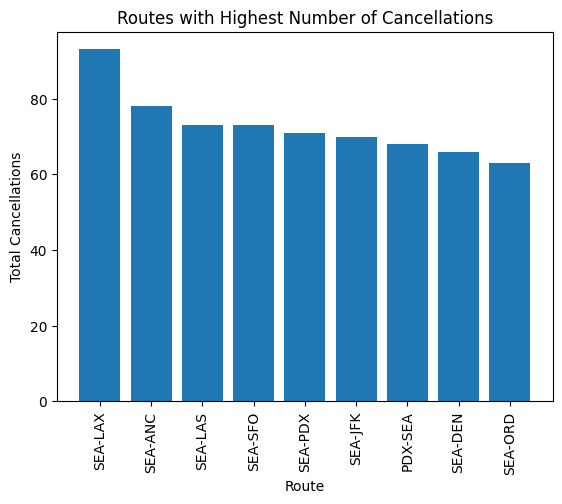

/tmp/ipython-input-1983132646.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)


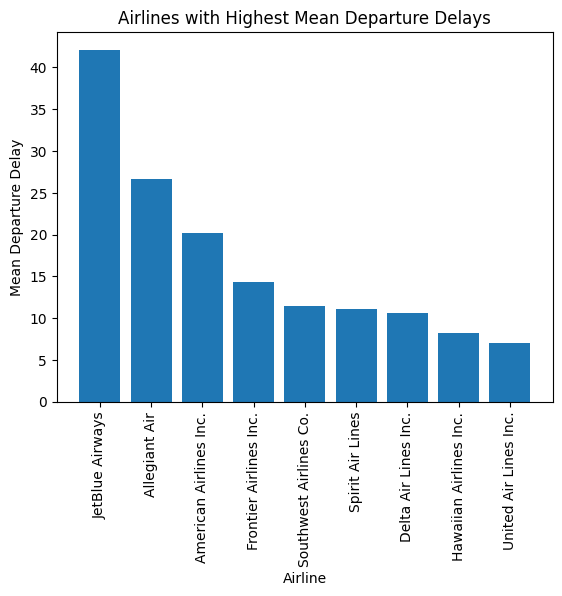

                 mean_dep_delay
group    origin                
< 10 mph PDX           6.686966
         SEA           7.857595
>= 10mph PDX           9.147024
         SEA           9.231060


In [5]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
flights2022 = pd.read_csv("https://raw.githubusercontent.com/AdedoyinJoshuaMastery/flights-delays-analysis/main/data/flights2022.csv")
flights_weather2022 = pd.read_csv("https://raw.githubusercontent.com/AdedoyinJoshuaMastery/flights-delays-analysis/main/data/flights_weather2022.csv")

# Create route column
flights2022["route"] = flights2022["origin"] + "-" + flights2022["dest"]

# Calculate mean departure delay and number of canceled flights for each unique flight route
routes_delays_cancels = flights2022.groupby("route").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()

# Identify routes with the highest mean departure delays
top_routes_by_delay = routes_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(9)

# Identify routes with the highest number of cancellations
top_routes_by_cancellations = routes_delays_cancels.sort_values("total_cancellations", ascending=False).head(9)

# Create a bar graph for highest number of cancellations
top9_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_by_cancellations["route"], top_routes_by_cancellations["total_cancellations"])
ax.set_xlabel("Route")
ax.set_ylabel("Total Cancellations")
ax.set_title("Routes with Highest Number of Cancellations")
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)
plt.show()
plt.close()

# Find mean departure delays and total cancellations by airline
airlines_delays_cancels = flights2022.groupby("airline").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()

# Identify airlines with the highest mean departure delay
top_airlines_by_delay = airlines_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(9)

# Identify airlines with the highest number of cancellations
top_airlines_by_cancellations = airlines_delays_cancels.sort_values("total_cancellations", ascending=False).head(9)

# Create a bar graph for highest mean depearture delay
top9_airline_delays_bar, ax = plt.subplots()
ax.bar(top_airlines_by_delay["airline"], top_airlines_by_delay["mean_dep_delay"])
ax.set_xlabel("Airline")
ax.set_ylabel("Mean Departure Delay")
ax.set_title("Airlines with Highest Mean Departure Delays")
ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)
plt.show()

# Are departure delays impacted by 10+ mph winds from each airport
flights_weather2022["group"] = flights_weather2022["wind_gust"].apply(lambda x: ">= 10mph" if x >= 10 else "< 10 mph")
wind_grouped_data = flights_weather2022.groupby(["group", "origin"]).agg(
    mean_dep_delay=("dep_delay", "mean")
)

print(wind_grouped_data)

wind_response = True